## Simple Logistic Regression Model (Loan Prediction)

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv(r'C:\Users\HP\Downloads\train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv(r'C:\Users\HP\Downloads\test_Y3wMUE5_7gLdaTN.csv')
train = train_data.copy()
test = test_data.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.drop(columns='Loan_ID',inplace =True)
test.drop(columns='Loan_ID',inplace =True)

In [10]:
train['Credit_History']=train['Credit_History'].astype(str)
test['Credit_History']=test['Credit_History'].astype(str)

In [11]:
cat_cols=[]
num_cols=[]

for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
        
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
        
print(cat_cols)
print(num_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


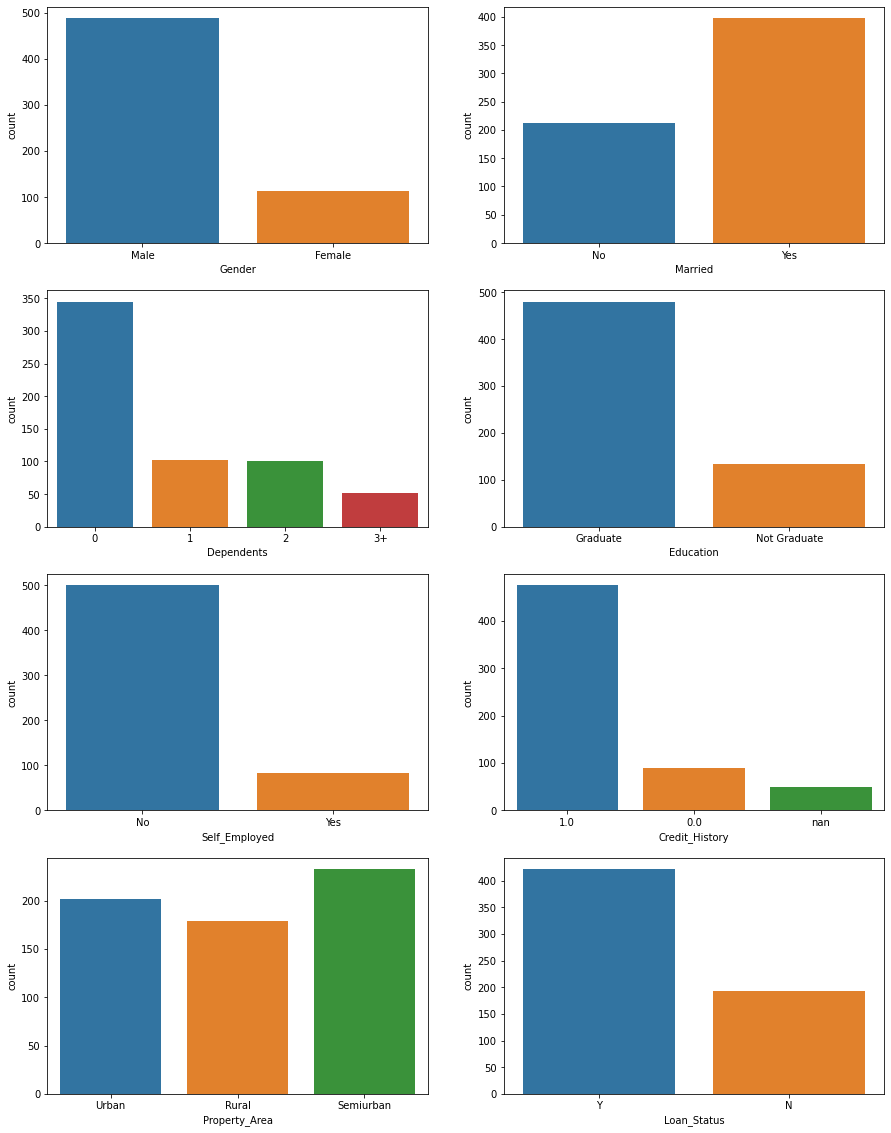

In [12]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(4,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

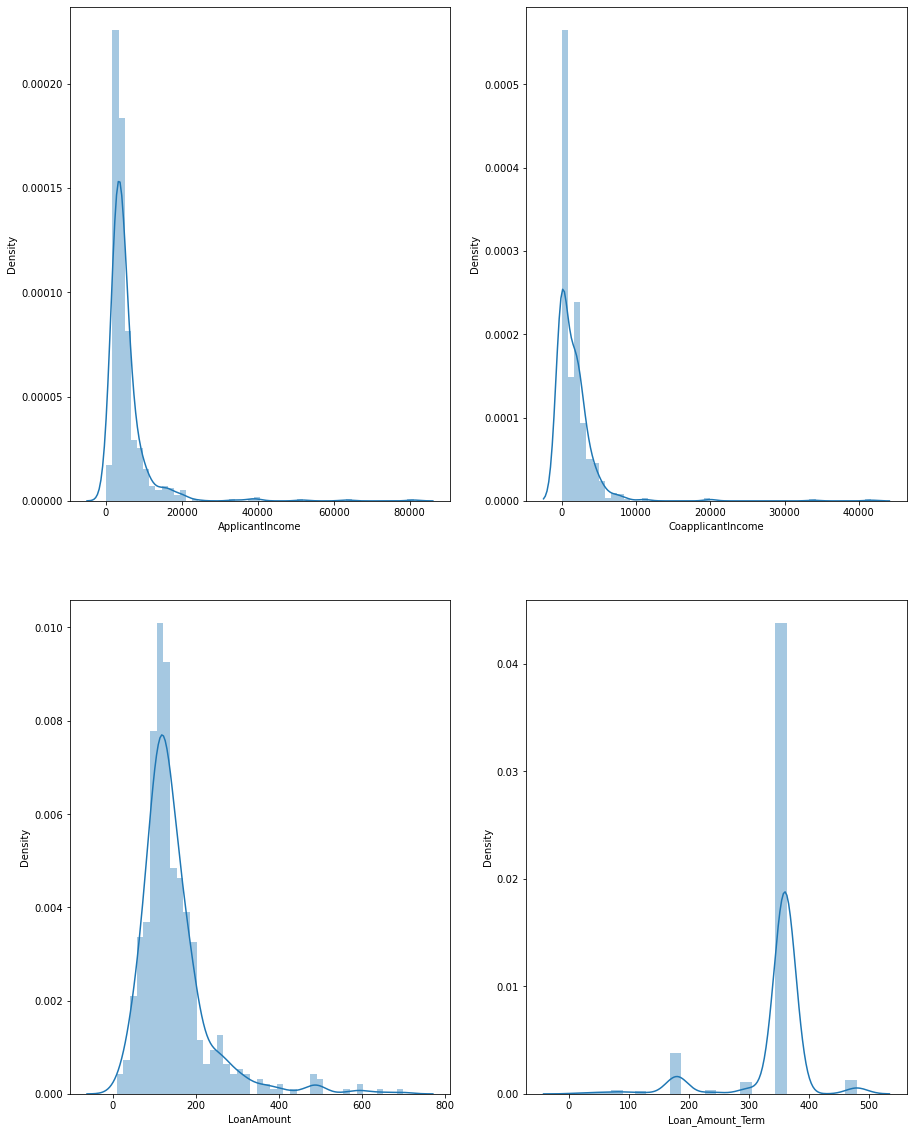

In [14]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(2,2,i)
    sns.distplot(train[col])
    i=i+1
    
plt.show()

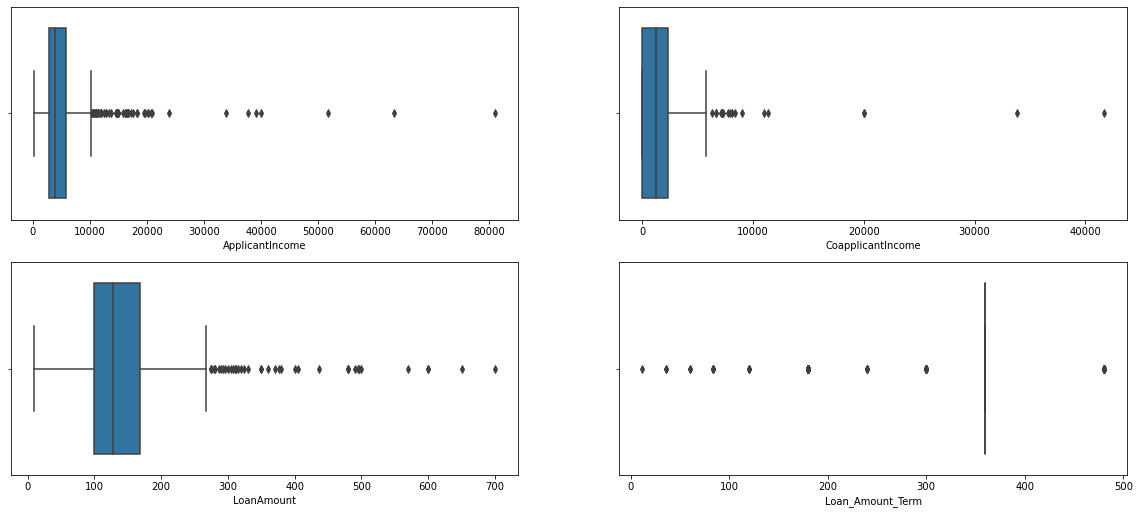

In [15]:
i=1
plt.figure(figsize=(20,18))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.boxplot(train[col])
    i=i+1
    
plt.show()
   

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
lr,ur=remove_outlier(train['ApplicantIncome'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['ApplicantIncome']=np.where(train['ApplicantIncome']>ur,ur,train['ApplicantIncome'])
train['ApplicantIncome']=np.where(train['ApplicantIncome']<lr,lr,train['ApplicantIncome'])

Lower Range : -1498.75 
Upper Range : 10171.25


In [18]:
lr,ur=remove_outlier(train['LoanAmount'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['LoanAmount']=np.where(train['LoanAmount']>ur,ur,train['LoanAmount'])
train['LoanAmount']=np.where(train['LoanAmount']<lr,lr,train['LoanAmount'])

Lower Range : nan 
Upper Range : nan


In [19]:
lr,ur=remove_outlier(train['CoapplicantIncome'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']>ur,ur,train['CoapplicantIncome'])
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']<lr,lr,train['CoapplicantIncome'])

Lower Range : -3445.875 
Upper Range : 5743.125


In [20]:
lr,ur=remove_outlier(train['Loan_Amount_Term'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']>ur,ur,train['Loan_Amount_Term'])
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']<lr,lr,train['Loan_Amount_Term'])

Lower Range : nan 
Upper Range : nan


In [21]:
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)


In [22]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
test["Gender"].fillna(test["Gender"].mode()[0], inplace = True)

In [23]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)

In [24]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)

In [25]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

In [26]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True) 
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace = True)

In [27]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median(), inplace = True) 
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].median(), inplace = True)

In [28]:
# Checking for missing values after preprocessing

In [29]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

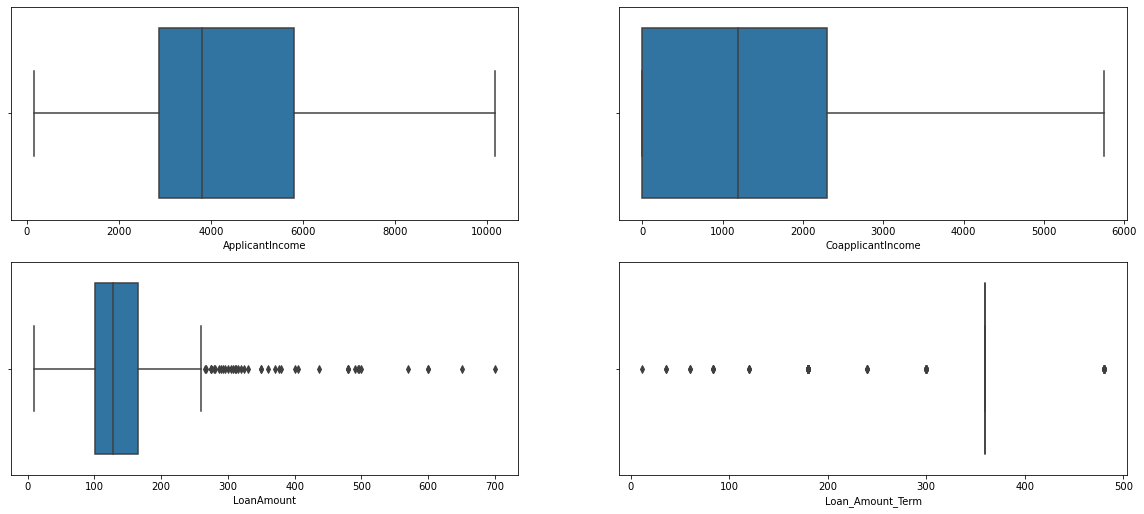

In [31]:
i=1
plt.figure(figsize=(20,18))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.boxplot(train[col])
    i=i+1
    
plt.show()

In [32]:
# Encoding Categorical Columns

In [33]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [34]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1,2,1


In [35]:
#Scaling Numerical Columns

In [36]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

train[num_cols]= ss.fit_transform(train[num_cols].values)

In [37]:
y= train['Loan_Status']
X= train.drop('Loan_Status', axis=1)

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.3, stratify=y, random_state=42)

In [39]:
# Building our Model

In [40]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [41]:
value= [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), GradientBoostingClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'AdaBoostClassifier',  'KNeighborsClassifier', 'GradientBoostingClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.8486486486486486
RandomForsetClassifier
0.8108108108108109
AdaBoostClassifier
0.7945945945945946
KNeighborsClassifier
0.7189189189189189
GradientBoostingClassifier
0.7945945945945946


In [42]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,nan,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
test=test.fillna(test.median())

In [44]:
cat_cols1=[]
num_cols1=[]

for col in test.columns:
    if test[col].dtypes=='object':
        cat_cols1.append(col)
        
for col in test.columns:
    if test[col].dtypes!='object':
        num_cols1.append(col)
        
print(cat_cols1)
print(num_cols1)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [45]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for col in cat_cols1:
    test[col]= le.fit_transform(test[col])

In [46]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

test[num_cols1]= ss.fit_transform(test[num_cols1].values)


In [47]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1,2
1,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1,2
2,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1,2
3,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,2,2
4,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1,2


In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred=lr.predict(test)

In [50]:
sample_submission=pd.read_csv(r'C:\Users\HP\Downloads\sample_submission.csv')

In [51]:
sample_submission['Loan_Status']=y_pred

In [52]:
status={1: 'Y', 0: 'N'}
sample_submission['Loan_Status']=sample_submission['Loan_Status'].map(status)

In [53]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [54]:
sample_submission.to_csv(r'C:\Users\HP\Desktop\Hackathon-Experiments-With-Data-Analytics-Vidhya-master.csv')

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
lr_prediction = lr.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test)*100)

Logistic Regression accuracy =  84.86486486486487


#### Thus, the Logistic Regression algorithm is approximately 84.86% accurate.